In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import json
from skimage import io
from sklearn.model_selection import train_test_split

import helper

In [2]:
path_root = '/home/aldopedraza/Documentos/data-cic/'
path_to_images = path_root + 'images/'
path_process_data = path_root + 'preprocess_data'

In [3]:
with open(path_root + 'via_region_data _final.json', 'r') as json_file:
    dict_json = json.load(json_file)
new_json = helper.clean_dict(dict_json)
images, labels = helper.load_images_labels(path_to_images, new_json)

In [4]:
# Split data into training and test
images_train, images_eval, label_train, label_eval = train_test_split(images, labels, test_size=.3)

In [5]:
# Split data into test and validation
images_test = images_eval[:45]
label_test = label_eval[:45]

images_val = images_eval[45:]
label_val = label_eval[45:]

In [6]:
# Save labels train, test, original
np.save(path_process_data + '/label_train', label_train)
np.save(path_process_data + '/label_test', label_test)
np.save(path_process_data + '/label_val', label_val)
np.save(path_process_data + '/label_all', labels)

In [7]:
# Save images 300, 512, original
images_train300 = helper.resize_images(images_train, 300, 300)
images_test300 = helper.resize_images(images_test, 300, 300)
images_val300 = helper.resize_images(images_val, 300, 300)
images_all300 = helper.resize_images(images, 300, 300)
np.save(path_process_data  + '/images_train_300x300', images_train300)
np.save(path_process_data  + '/images_test_300x300', images_test300)
np.save(path_process_data  + '/images_val_300x300', images_val300)
np.save(path_process_data  + '/images_all_300x300', images_all300)

images_train512 = helper.resize_images(images_train, 512, 512)
images_test512 = helper.resize_images(images_test, 512, 512)
images_val512 = helper.resize_images(images_val, 512, 512)
images_all512 = helper.resize_images(images, 512, 512)
np.save(path_process_data  + '/images_train_512x512', images_train512)
np.save(path_process_data  + '/images_test_512x512', images_test512)
np.save(path_process_data  + '/images_val_512x512', images_val512)
np.save(path_process_data  + '/images_all_512x512', images_all512)

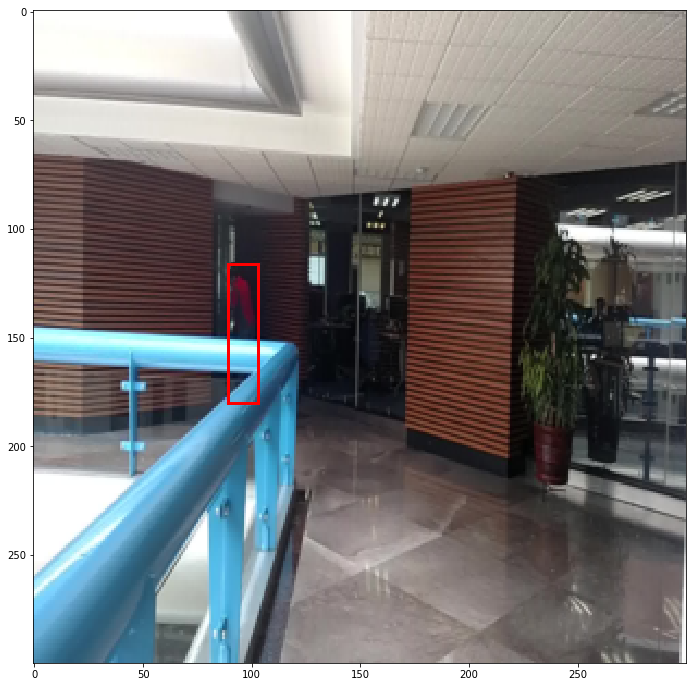

In [8]:
# Validating data
helper.show_image_bb(images_val300[0], helper.normilize_to_pixel(label_val[0], 300, 300))